In [1]:
# Change directory to the root of the project
import os 
os.chdir('..')
os.chdir('..')
os.chdir('..')
print(f"Working directory: {os.getcwd()}")

Working directory: /Users/eohjelle/Documents/2025-dots-and-boxes/dots-and-boxes


In [2]:
# Initialize opponents

from applications.tic_tac_toe.game_state import TicTacToeState, TicTacToeAction
from core.implementations import MCTS, Minimax, RandomAgent

state = TicTacToeState()
agent = Minimax(state)
agent()

def minimax_agent_factory(state: TicTacToeState) -> Minimax:
    agent.set_root(state)
    return agent

opponents = {
    "Minimax": minimax_agent_factory,
    "RandomAgent": lambda state: RandomAgent(state)
}

In [3]:
# Run benchmarks

from core import benchmark
from core.agent import Agent
import time


# Define different MCTS configurations with varying numbers of iterations
iterations_to_test = [1, 10, 50, 100, 500, 1000, 5000]
    
minimax_draw_rate = []
random_score = []
for iterations in iterations_to_test:
    print(f"Benchmarking MCTS with {iterations} iterations...")
    
    # Run benchmark
    start_time = time.time()
    stats = benchmark(
        create_agent=lambda state: MCTS(state, num_simulations=iterations),
        create_opponents=opponents,
        initial_state=lambda: TicTacToeState(),
        num_games=100  # Number of games to play for each configuration
    )
    elapsed_time = time.time() - start_time
    print(f"Time taken: {elapsed_time:.2f} seconds")
    
    # Store results
    minimax_draw_rate.append(stats["Minimax"]["draw_rate"])
    random_score.append(stats["RandomAgent"]["win_rate"] - stats["RandomAgent"]["loss_rate"])
    print(f"Minimax draw rate: {minimax_draw_rate[-1]:.2f}")
    print(f"RandomAgent score: {random_score[-1]:.2f}\n")




Benchmarking MCTS with 1 iterations...
Time taken: 0.05 seconds
Minimax draw rate: 0.00
RandomAgent score: 0.34

Benchmarking MCTS with 10 iterations...
Time taken: 0.24 seconds
Minimax draw rate: 0.22
RandomAgent score: 0.59

Benchmarking MCTS with 50 iterations...
Time taken: 1.19 seconds
Minimax draw rate: 0.74
RandomAgent score: 0.90

Benchmarking MCTS with 100 iterations...
Time taken: 2.23 seconds
Minimax draw rate: 0.77
RandomAgent score: 0.85

Benchmarking MCTS with 500 iterations...
Time taken: 11.09 seconds
Minimax draw rate: 0.94
RandomAgent score: 0.92

Benchmarking MCTS with 1000 iterations...
Time taken: 21.83 seconds
Minimax draw rate: 1.00
RandomAgent score: 0.97

Benchmarking MCTS with 5000 iterations...
Time taken: 106.40 seconds
Minimax draw rate: 1.00
RandomAgent score: 0.92



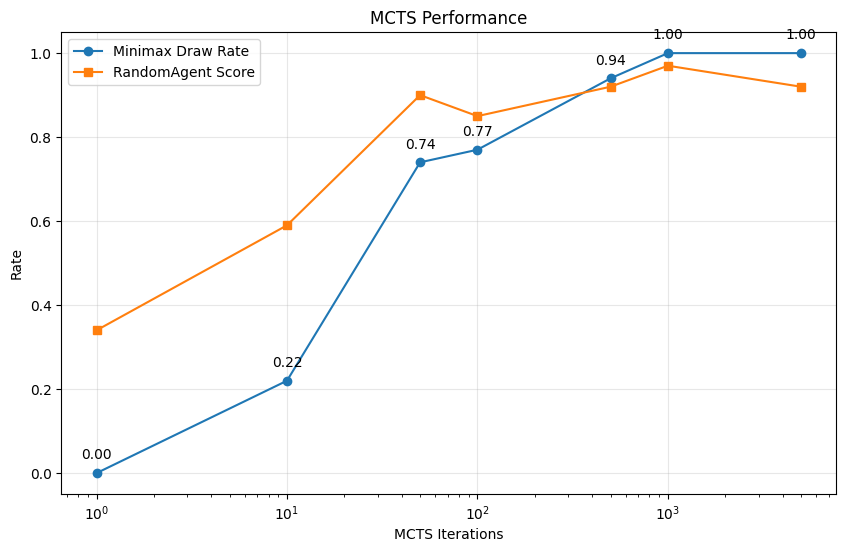

In [6]:

import matplotlib.pyplot as plt
import numpy as np
from typing import Dict, Any

# Create plot
plt.figure(figsize=(10, 6))
plt.plot(iterations_to_test, minimax_draw_rate, marker='o', label='Minimax Draw Rate')
plt.plot(iterations_to_test, random_score, marker='s', label='RandomAgent Score')

plt.xscale('log')  # Use log scale for x-axis since iterations vary by orders of magnitude
plt.xlabel('MCTS Iterations')
plt.ylabel('Rate')
plt.title('MCTS Performance')
plt.grid(True, alpha=0.3)
plt.legend()

# Add exact values as annotations
for i, iterations in enumerate(iterations_to_test):
    plt.annotate(f"{minimax_draw_rate[i]:.2f}", 
                (iterations, minimax_draw_rate[i]), 
                textcoords="offset points", 
                xytext=(0,10), 
                ha='center')

# Save plot
plt.savefig('tic_tac_toe_mcts_benchmark.png')
plt.show()
